 Assignment Questions:

 EDA - 1






 Bike Details Dataset:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy as sp
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [ ]:
df=pd.read_csv("BIKE DETAILS.csv")
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


Questions:

Que.1  What is the range of selling prices in the dataset.

In [ ]:
selling_prices = df['selling_price']
price_range = selling_prices.max() - selling_prices.min()

print(f"The range of selling prices is: {price_range}")

The range of selling prices is: 755000


Que.2  What is the median selling price for bikes in the dataset.

In [ ]:
median_price = df['selling_price'].median()

print(f"The median selling price for bikes is: {median_price}")

The median selling price for bikes is: 45000.0


Que.3  What is the most common seller type.

In [ ]:
df.seller_type

,seller_type
0,Individual
1,Individual
2,Individual
3,Individual
4,Individual
...,...
1056,Individual
1057,Individual
1058,Individual
1059,Individual


In [ ]:
most_common_seller_type = df['seller_type'].mode()[0]

print(f"The most common seller type is: {most_common_seller_type}")

The most common seller type is: Individual


Que.4  How many bikes have driven more than 50,000 kilometers.

In [ ]:
bikes_over_50000_km = df[df['km_driven'] > 50000]

In [ ]:
count_bikes_over_50000_km = bikes_over_50000_km.shape[0]

In [ ]:
print(f"Number of bikes that have driven more than 50,000 kilometers: {count_bikes_over_50000_km}")

Number of bikes that have driven more than 50,000 kilometers: 170


Que.5  What is the average km_driven value for each ownership type

In [ ]:
average_km_driven = df.groupby('owner')['km_driven'].mean()

print(average_km_driven)

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


Que.6  What proportion of bikes are from the year 2015 or older.

In [ ]:
older_bikes = df[df['year'] <= 2015]
proportion = len(older_bikes) / len(df)

print(f"The proportion of bikes from the year 2015 or older is: {proportion:.2f}")

The proportion of bikes from the year 2015 or older is: 0.57


Que.7 What is the trend of missing values across the dataset

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


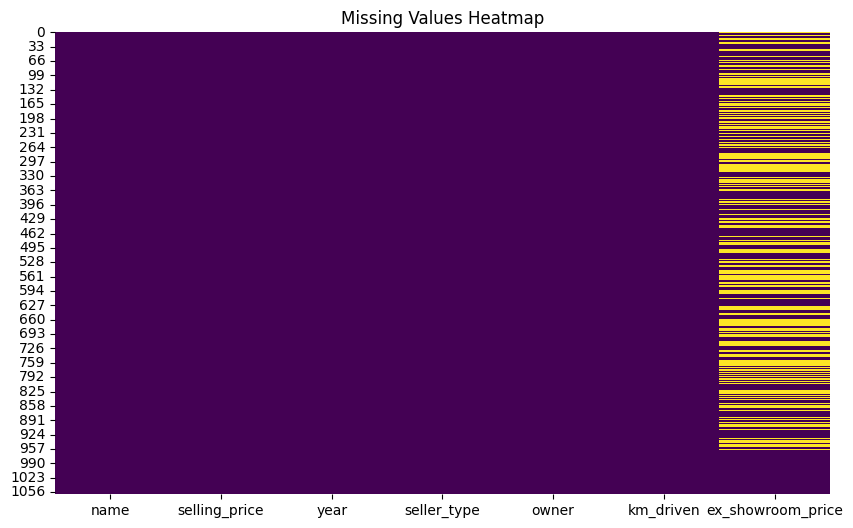

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Que.8  What is the highest ex_showroom_price recorded, and for which bike

In [ ]:
df.	ex_showroom_price

,ex_showroom_price
0,NaN
1,NaN
2,148114.0
3,89643.0
4,NaN
...,...
1056,52000.0
1057,51000.0
1058,57000.0
1059,58000.0


In [ ]:
max_price_row = df.loc[df['ex_showroom_price'].idxmax()]

highest_price_bike = max_price_row
highest_price = max_price_row['ex_showroom_price']

print(f"The highest ex-showroom price is {highest_price} for the bike {highest_price_bike}.")

The highest ex-showroom price is 1278000.0 for the bike name                 Harley-Davidson Street Bob
selling_price                            750000
year                                       2013
seller_type                          Individual
owner                                 2nd owner
km_driven                                 12000
ex_showroom_price                     1278000.0
Name: 134, dtype: object.


Que.9  What is the total number of bikes listed by each seller type

In [ ]:
total_bikes_by_seller = df['seller_type'].value_counts()

print(total_bikes_by_seller)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


Que.10  What is the relationship between selling_price and km_driven for first-owner bike

In [ ]:
first_owner_bikes = df[df['owner'] == 'First Owner']

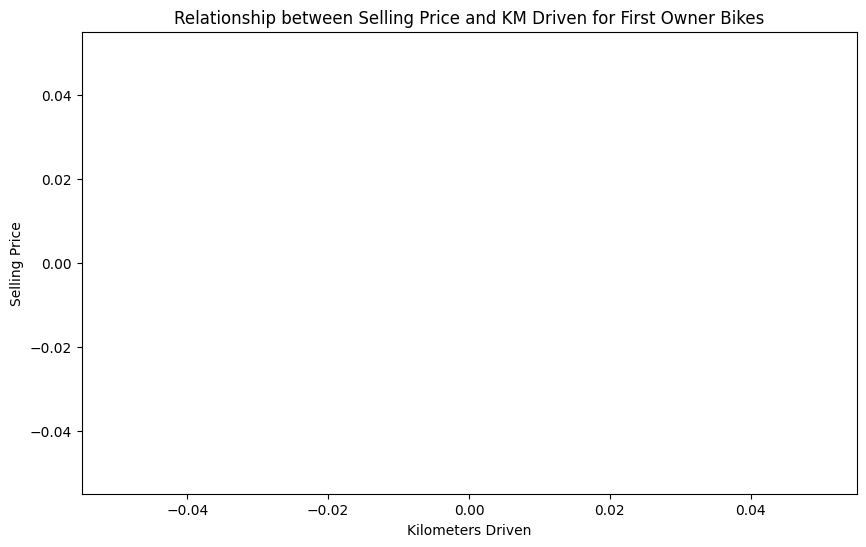

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title('Relationship between Selling Price and KM Driven for First Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

Que.11  Identify and remove outliers in the km_driven column using the IQR method

In [ ]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]


df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print(df_cleaned)

                                     name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1054                     Hero  CBZ Xtreme          20000  2010  Individual   
1055                        Bajaj  ct 100          18000  2017  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner

Que 12  Perform a bivariate analysis to visualize the relationship between year and selling_price

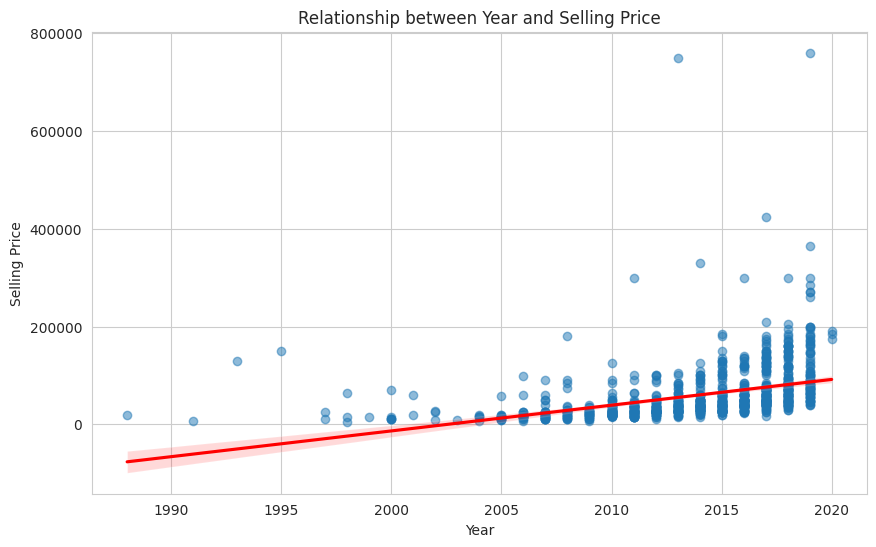

In [ ]:

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.regplot(x='year', y='selling_price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')

plt.show()

Que.13  What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year

In [ ]:

current_year = 2025
df['age'] = current_year - df['year']
average_depreciation = df.groupby('age')['selling_price'].mean()
print("Average depreciation in selling price based on bike's age:")
print(average_depreciation)

Average depreciation in selling price based on bike's age:
age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64


Que.14  Which bike names are priced significantly above the average price for their manufacturing year

In [ ]:
average_price_per_year = df.groupby('year')['selling_price'].mean()
df = df.merge(average_price_per_year, on='year', suffixes=('', '_avg_year'))
significantly_above_avg = df[df['selling_price'] > df['selling_price_avg_year'] * 1.5]
print("Bikes priced significantly above the average price for their manufacturing year:")
print(significantly_above_avg[['name', 'selling_price', 'year']])

Bikes priced significantly above the average price for their manufacturing year:
                                     name  selling_price  year
2     Royal Enfield Classic Gunmetal Grey         150000  2018
7    Royal Enfield Bullet 350 [2007-2011]         180000  2008
13                          Yamaha YZF R3         365000  2019
18    Royal Enfield Classic Gunmetal Grey         150000  2018
23                          Jawa Standard         180000  2019
..                                    ...            ...   ...
979             Royal Enfield Thunder 500         105000  2015
981             Royal Enfield Thunder 350         105000  2013
983             Royal Enfield Classic 350         100000  2015
984             Royal Enfield Classic 500          95000  2014
985             Royal Enfield Classic 500          90000  2011

[157 rows x 3 columns]


Que.15  Develop a correlation matrix for numeric columns and visualize it using a heatmap.

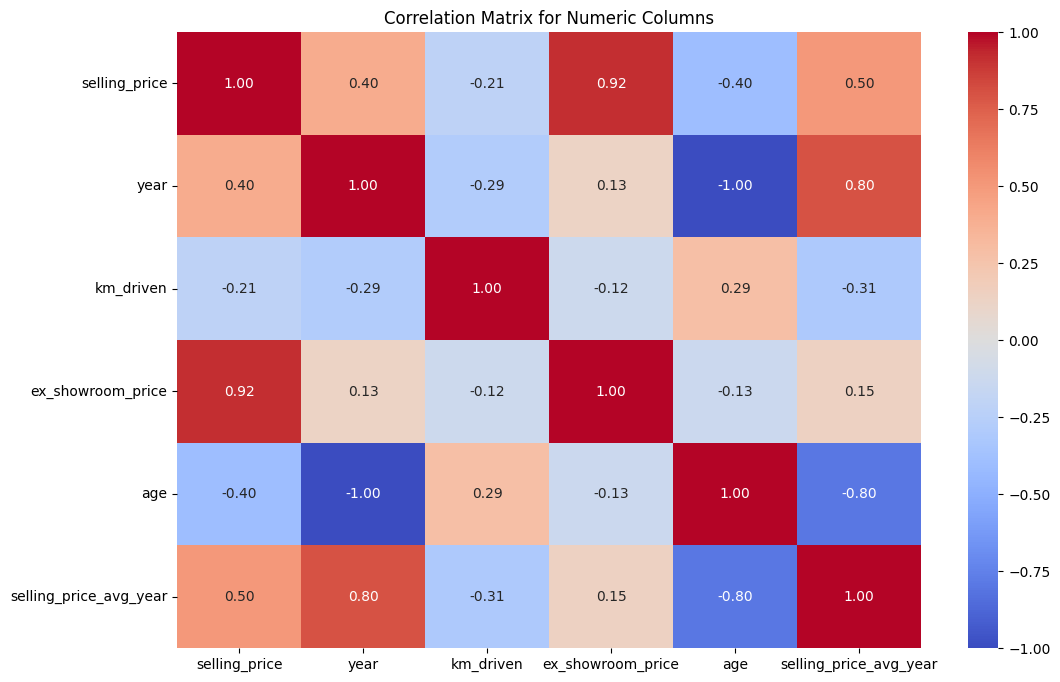

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Numeric Columns")
plt.show()




EDA-2


Car Sale Dataset   

 Questions:

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving Car Sale.csv to Car Sale.csv


In [ ]:
df2=pd.read_csv('Car Sale.csv')
df2

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


Que.1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?  
'''

Average selling price of cars for each dealer:
Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                           

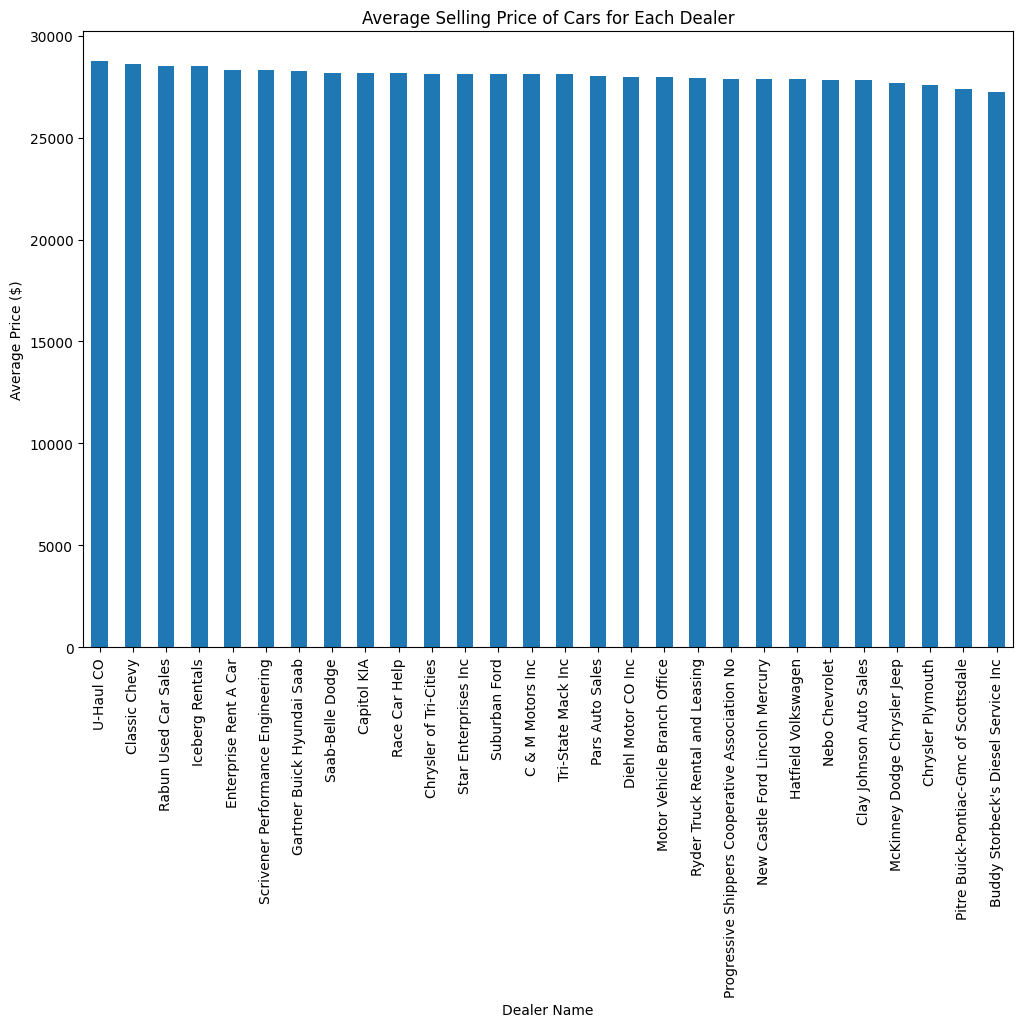

In [ ]:
avg_price_per_dealer = df2.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("Average selling price of cars for each dealer:")
print(avg_price_per_dealer)

plt.figure(figsize=(12, 8))
avg_price_per_dealer.plot(kind='bar')
plt.title("Average Selling Price of Cars for Each Dealer")
plt.xlabel("Dealer Name")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=90)
plt.show()

Que.2  Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends

In [ ]:
price_variation_per_company = df2.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("Price variation for each car brand:")
print(price_variation_per_company)

Price variation for each car brand:
Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


Que.3  What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare

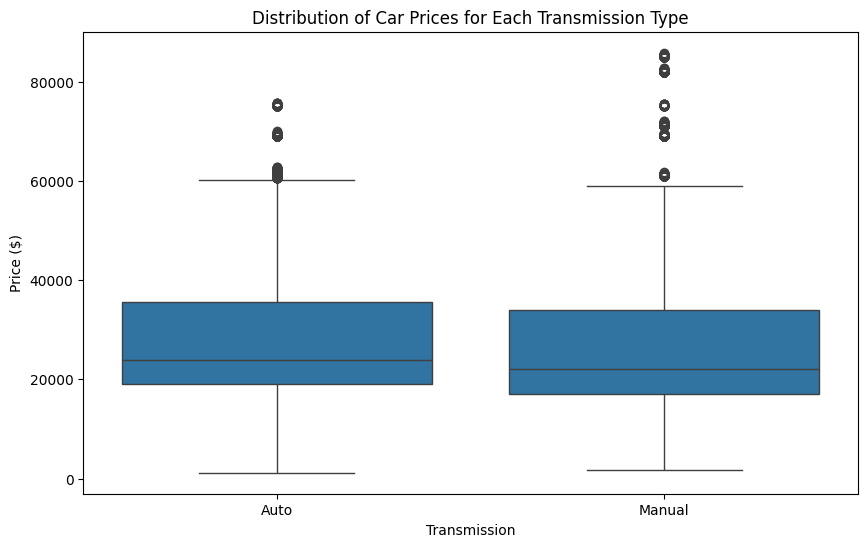

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df2)
plt.title("Distribution of Car Prices for Each Transmission Type")
plt.show()

Que 4  What is the distribution of car prices across different regions

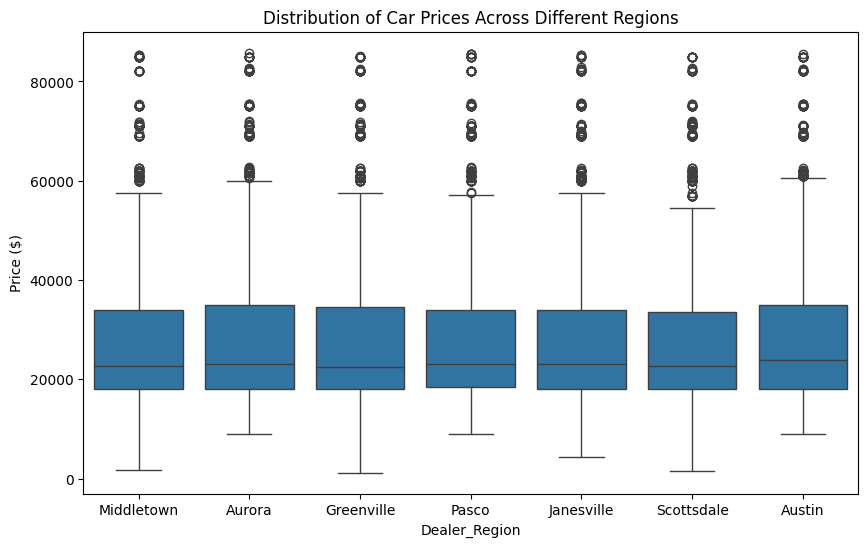

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df2)
plt.title("Distribution of Car Prices Across Different Regions")
plt.show()

Que.5  What is the distribution of cars based on body styles

Distribution of cars based on body styles:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


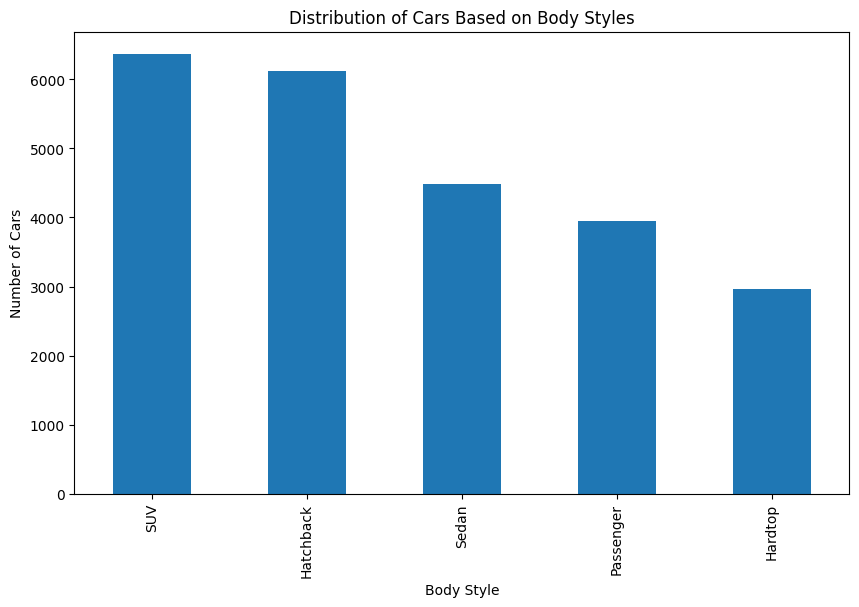

In [ ]:
body_style_distribution = df2['Body Style'].value_counts()
print("Distribution of cars based on body styles:")
print(body_style_distribution)


plt.figure(figsize=(10, 6))
body_style_distribution.plot(kind='bar')
plt.title("Distribution of Cars Based on Body Styles")
plt.xlabel("Body Style")
plt.ylabel("Number of Cars")
plt.xticks(rotation=90)
plt.show()

Que 6  How does the average selling price of cars vary by customer gender and annual income

Average selling price of cars by customer gender and annual income:
Annual Income  (-1109.92, 2248064.0]  (2248064.0, 4486048.0]  \
Gender                                                         
Female                  28218.888484             30183.05298   
Male                    27996.376891             29021.87871   

Annual Income  (4486048.0, 6724032.0]  (6724032.0, 8962016.0]  \
Gender                                                          
Female                   28318.875000                     NaN   
Male                     27520.139535            40333.333333   

Annual Income  (8962016.0, 11200000.0]  
Gender                                  
Female                             NaN  
Male                           26001.0  


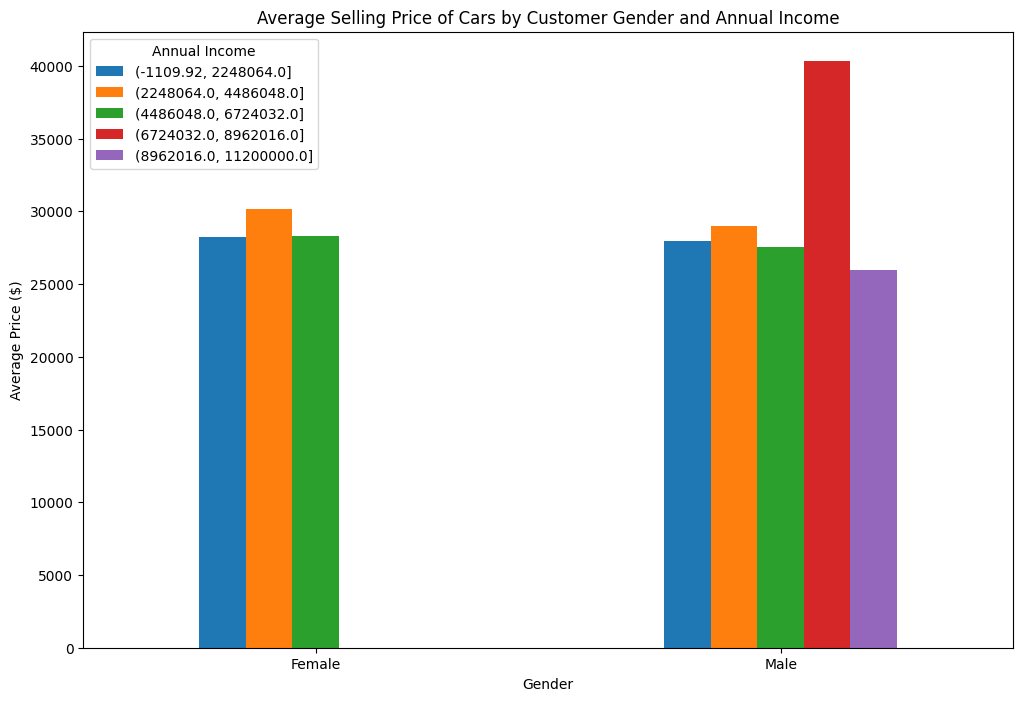

In [ ]:
avg_price_by_gender_income = df2.groupby(['Gender', pd.cut(df2['Annual Income'], bins=5)])['Price ($)'].mean().unstack()
print("Average selling price of cars by customer gender and annual income:")
print(avg_price_by_gender_income)


avg_price_by_gender_income.plot(kind='bar', figsize=(12, 8))
plt.title("Average Selling Price of Cars by Customer Gender and Annual Income")
plt.xlabel("Gender")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=0)
plt.show()

Que.7  What is the distribution of car prices by region, and how does the number of cars sold vary by region

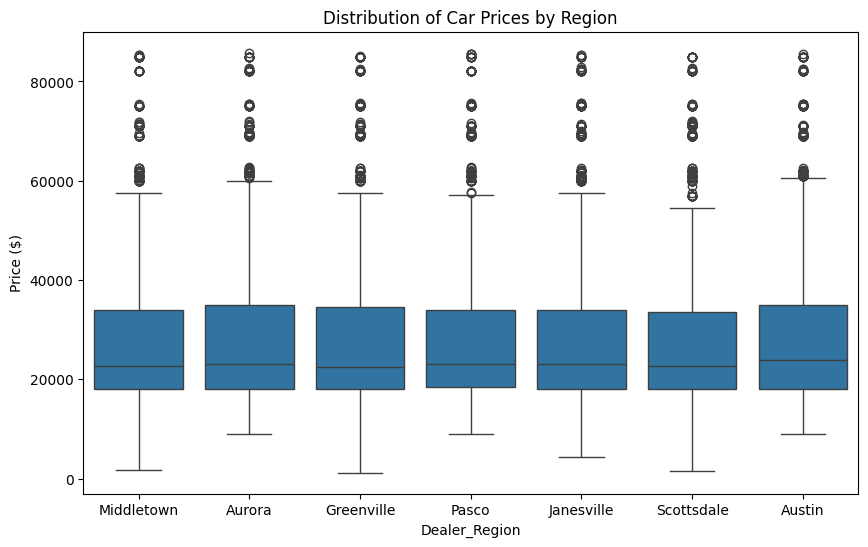

Number of cars sold by region:
Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: count, dtype: int64


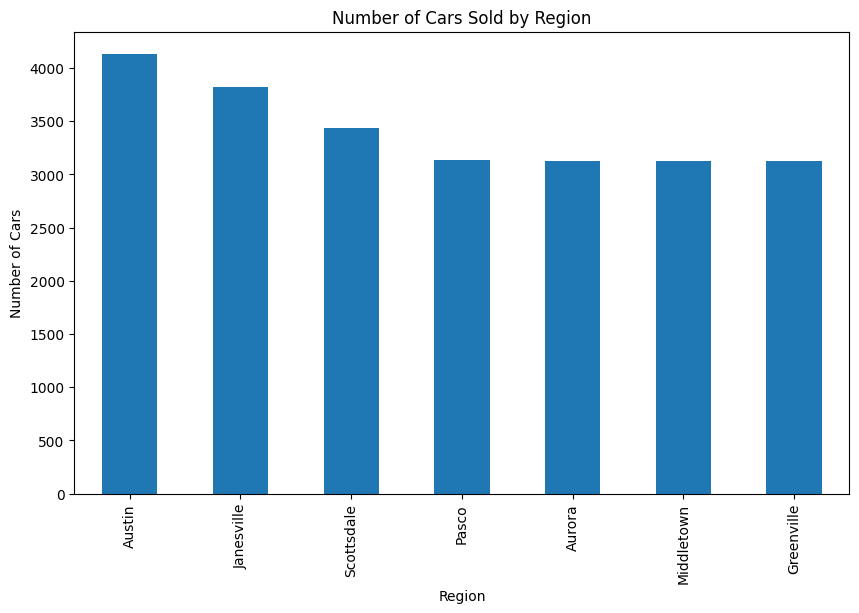

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df2)
plt.title("Distribution of Car Prices by Region")
plt.show()

cars_sold_by_region = df2['Dealer_Region'].value_counts()
print("Number of cars sold by region:")
print(cars_sold_by_region)

plt.figure(figsize=(10, 6))
cars_sold_by_region.plot(kind='bar')
plt.title("Number of Cars Sold by Region")
plt.xlabel("Region")
plt.ylabel("Number of Cars")
plt.xticks(rotation=90)
plt.show()

Que.8  How does the average car price differ between cars with different engine size

Average car price by engine size:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


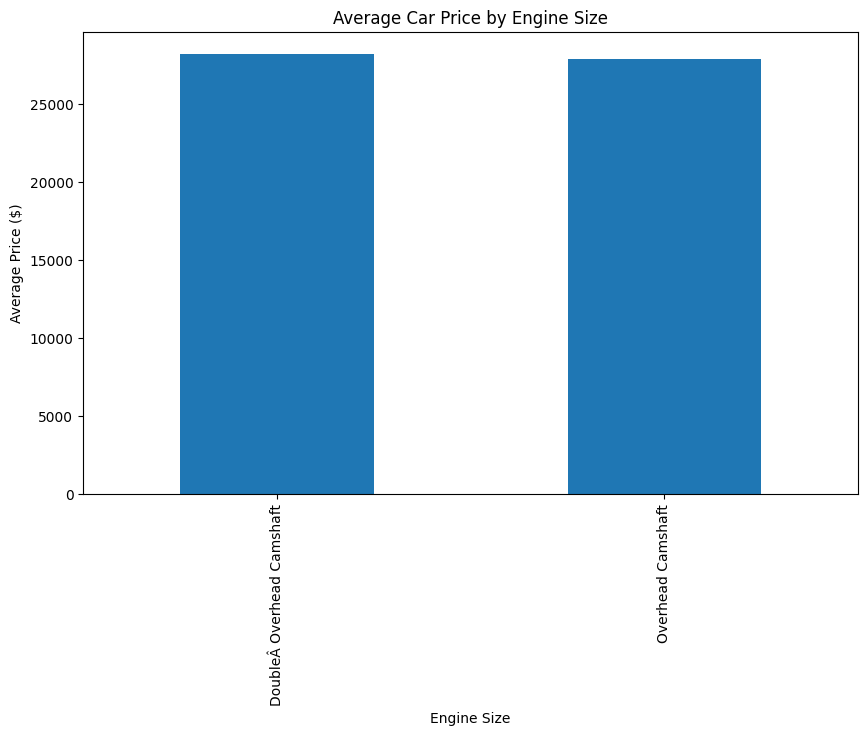

In [ ]:
avg_price_by_engine_size = df2.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print("Average car price by engine size:")
print(avg_price_by_engine_size)


plt.figure(figsize=(10, 6))
avg_price_by_engine_size.plot(kind='bar')
plt.title("Average Car Price by Engine Size")
plt.xlabel("Engine Size")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=90)
plt.show()

Que.9  How do car prices vary based on the customer’s annual income bracket

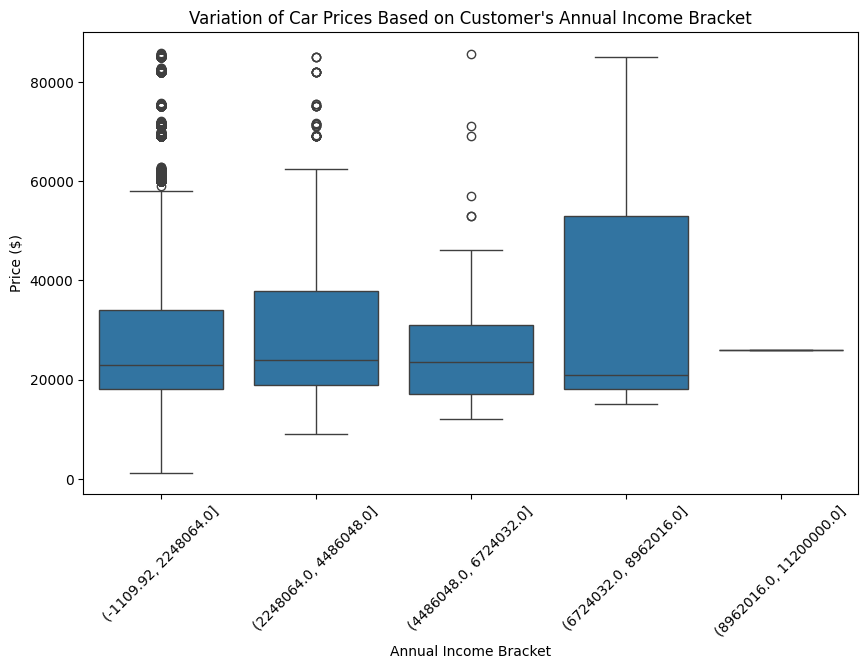

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(df2['Annual Income'], bins=5), y='Price ($)', data=df2)
plt.title("Variation of Car Prices Based on Customer's Annual Income Bracket")
plt.xlabel("Annual Income Bracket")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.show()

Que 10  What are the top 5 car models with the highest number of sales, and how does their price distribution look

Top 5 car models with the highest number of sales:
Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


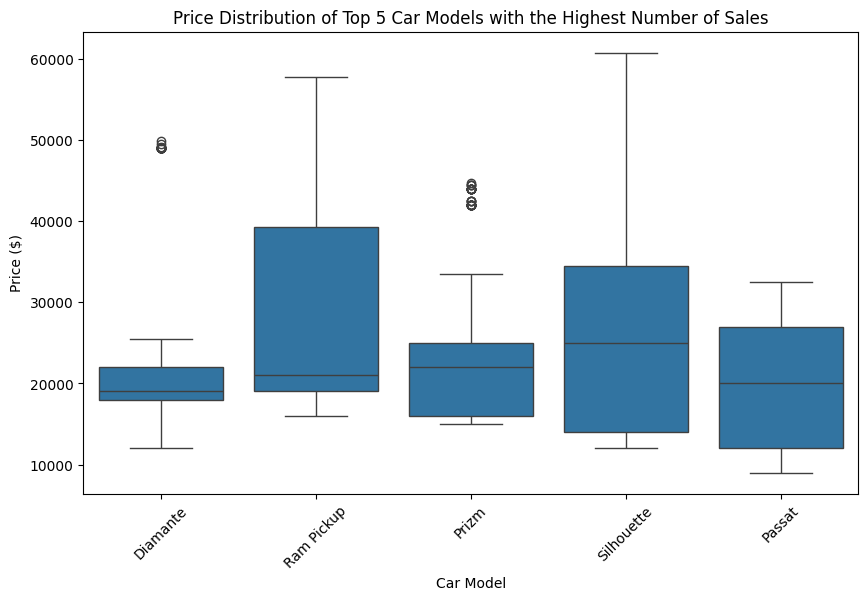

In [ ]:
top_5_car_models = df2['Model'].value_counts().head(5)
print("Top 5 car models with the highest number of sales:")
print(top_5_car_models)


plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price ($)', data=df2[df2['Model'].isin(top_5_car_models.index)])
plt.title("Price Distribution of Top 5 Car Models with the Highest Number of Sales")
plt.xlabel("Car Model")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.show()

Que.11  How does car price vary with engine size across different car colors, and which colors have the highest price variation


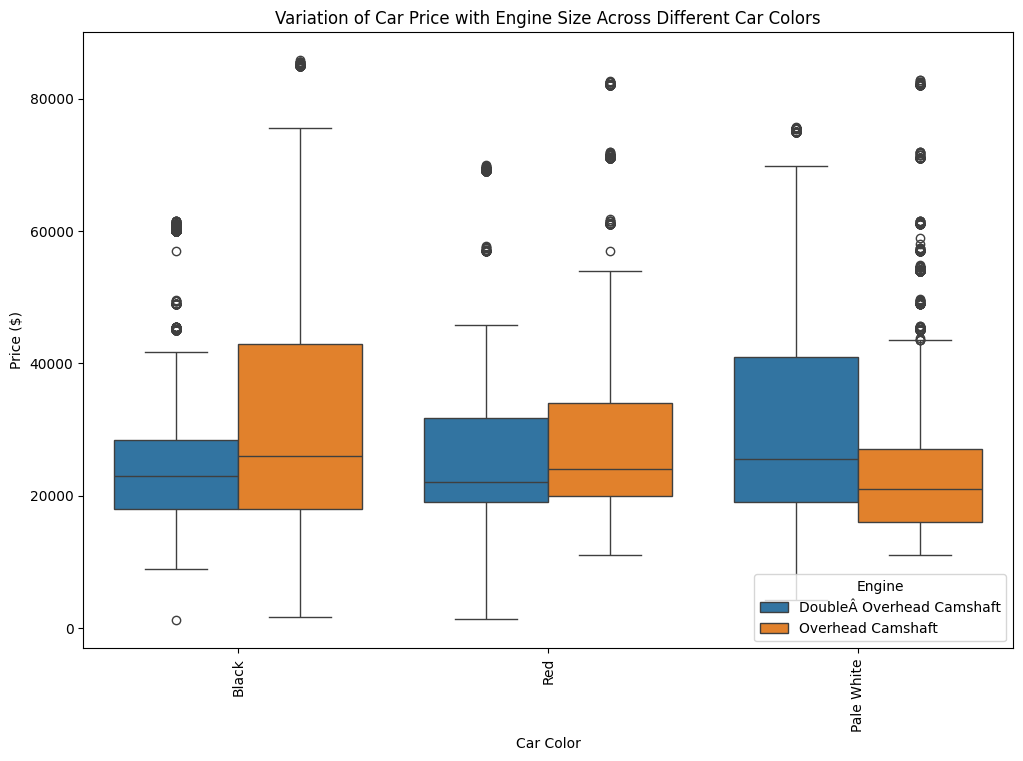

Colors with the highest price variation:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Color', y='Price ($)', hue='Engine', data=df2)
plt.title("Variation of Car Price with Engine Size Across Different Car Colors")
plt.xlabel("Car Color")
plt.ylabel("Price ($)")
plt.xticks(rotation=90)
plt.show()

color_price_variation = df2.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Colors with the highest price variation:")
print(color_price_variation)

Que.12  Is there any seasonal trend in car sales based on the date of sale

Seasonal trend in car sales based on the date of sale:
Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: Car_id, dtype: int64


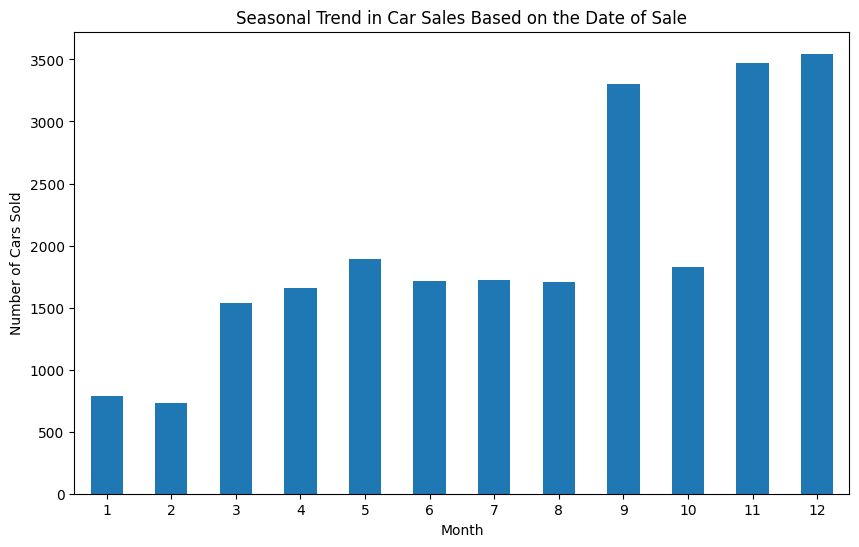

In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Month'] = df2['Date'].dt.month
monthly_sales = df2.groupby('Month')['Car_id'].count()
print("Seasonal trend in car sales based on the date of sale:")
print(monthly_sales)


plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.title("Seasonal Trend in Car Sales Based on the Date of Sale")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.xticks(rotation=0)
plt.show()

Que 13  How does the car price distribution change when considering different combinations of body style and
transmission type

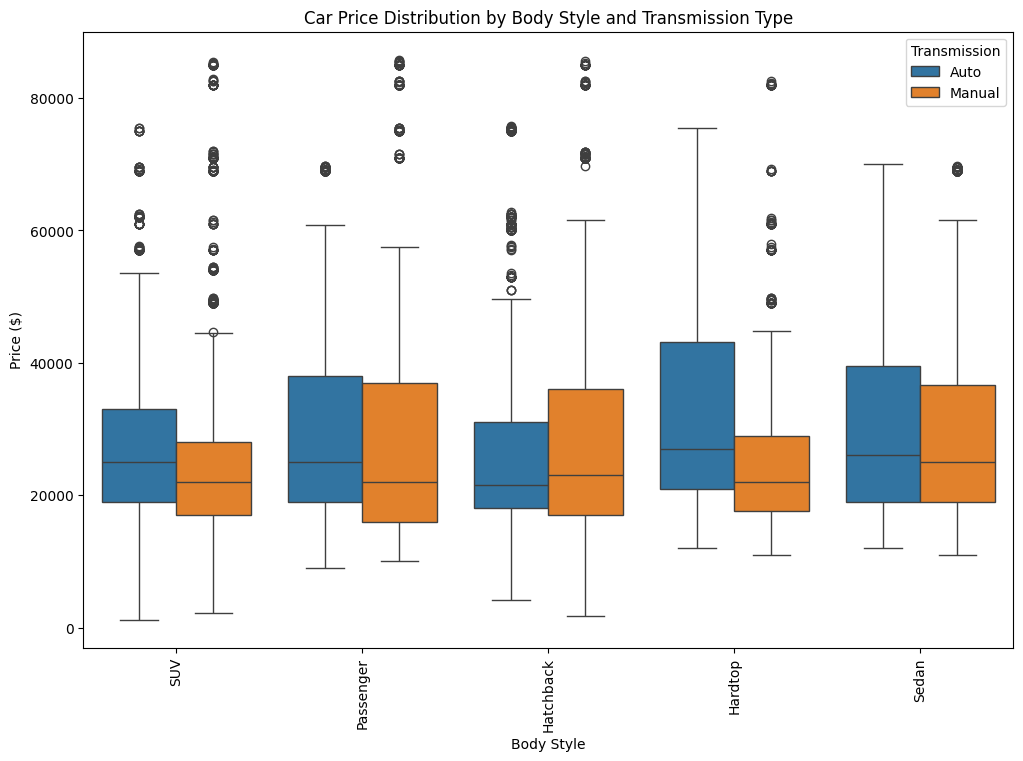

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df2)
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xlabel("Body Style")
plt.ylabel("Price ($)")
plt.xticks(rotation=90)
plt.show()

Que.14 What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact

Correlation between car price, engine size, and annual income of customers:
               Price ($)  Engine  Annual Income
Price ($)       1.000000     NaN       0.012065
Engine               NaN     NaN            NaN
Annual Income   0.012065     NaN       1.000000


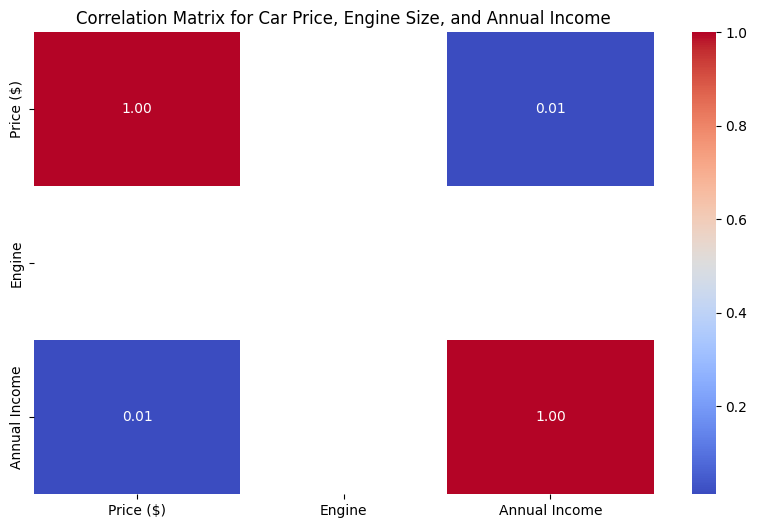

In [ ]:
df2['Engine'] = df2['Engine'].apply(lambda x: int(''.join(filter(str.isdigit, str(x)))) if any(filter(str.isdigit, str(x))) else 0)
correlation_matrix = df2[['Price ($)', 'Engine', 'Annual Income']].corr()
print("Correlation between car price, engine size, and annual income of customers:")
print(correlation_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Car Price, Engine Size, and Annual Income")
plt.show()

Que 15  How does the average car price vary across different car models and engine types

Average car price by car models and engine types:
Engine               0
Model                 
3-Sep     37986.380117
3000GT    22282.250825
300M      21394.888889
323i      17355.634615
328i      27821.359223
...                ...
Viper     30905.258333
Voyager   31491.110497
Windstar  23682.842975
Wrangler  20134.548780
Xterra    18901.076087

[154 rows x 1 columns]


<Figure size 2000x800 with 0 Axes>

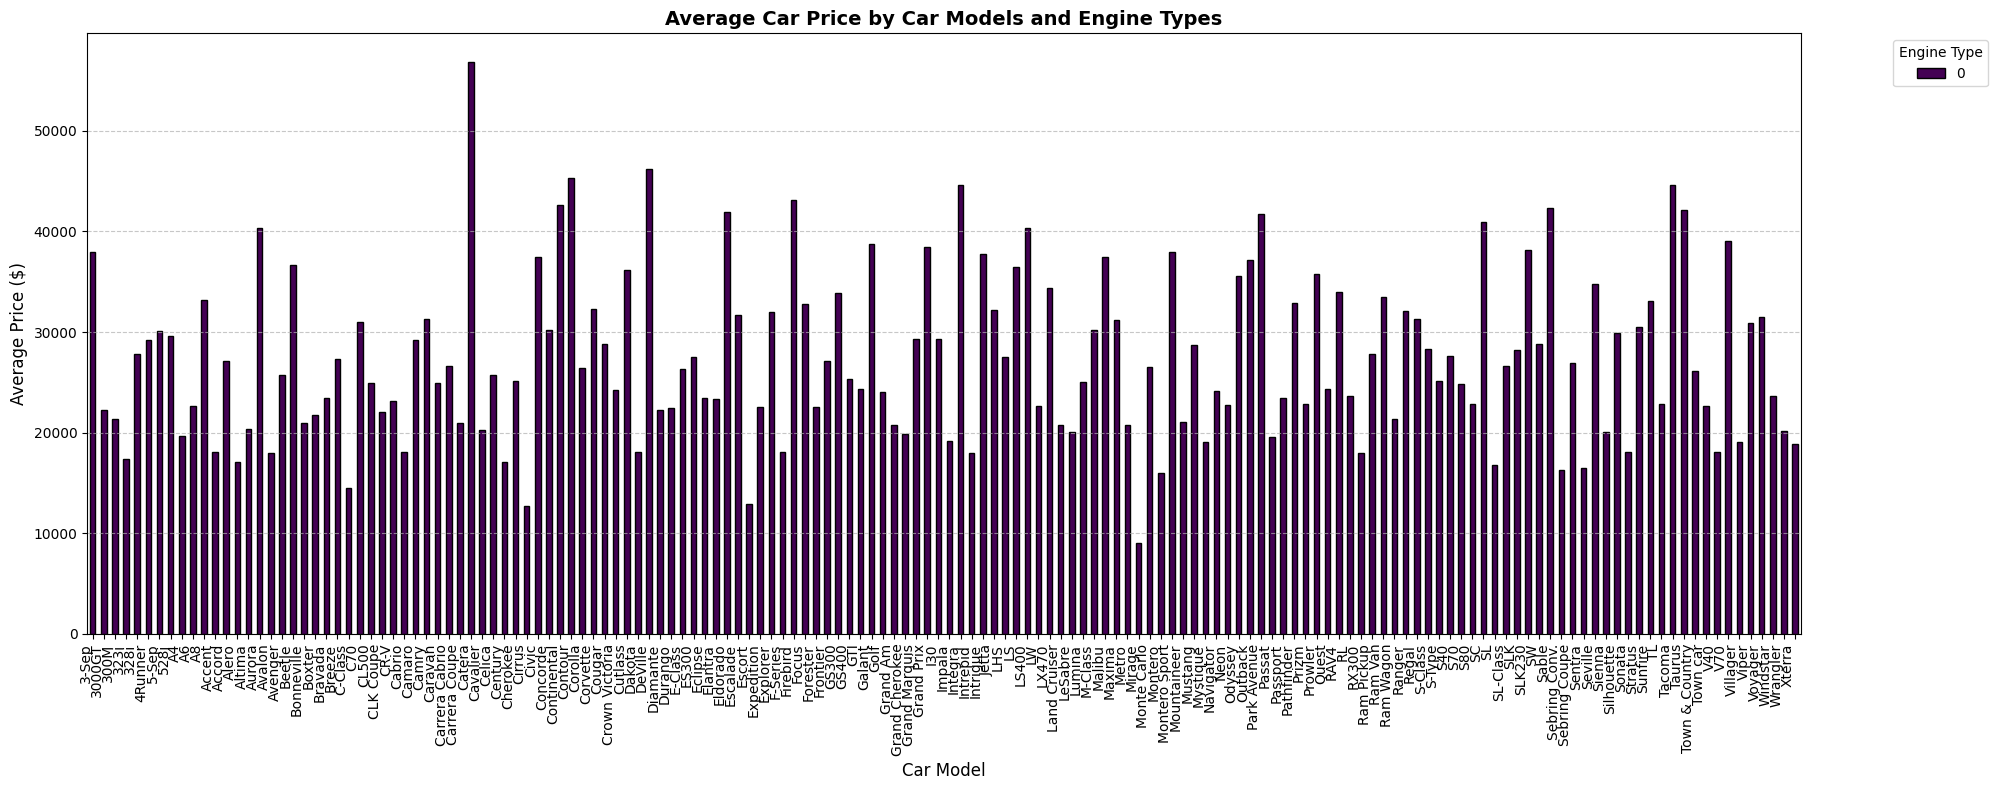

In [ ]:
avg_price_by_model_engine = df2.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
print("Average car price by car models and engine types:")
print(avg_price_by_model_engine)

# Plotting the average car price by car models and engine types
plt.figure(figsize=(20, 8))
ax = avg_price_by_model_engine.plot(kind='bar', stacked=True, width=0.5, colormap='viridis', edgecolor='black', figsize=(20, 8))

plt.title("Average Car Price by Car Models and Engine Types", fontsize=14, fontweight='bold')
plt.xlabel("Car Model", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)

plt.xticks(np.arange(len(avg_price_by_model_engine.index)), avg_price_by_model_engine.index, rotation=90, ha='right', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Engine Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

EDA - 3

 Amazon Sales Data



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re


In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving amazon.csv to amazon.csv


In [ ]:
df3=pd.read_csv('amazon.csv')
df3

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

Que.1 What is the average rating for each product category

In [ ]:

df3['rating'] = pd.to_numeric(df3['rating'], errors='coerce')
df3['rating_count'] = pd.to_numeric(df3['rating_count'].replace({'₹': '', ',': ''}, regex=True), errors='coerce')


In [ ]:
average_rating_by_category = df3.groupby('category')['rating'].mean()
print("Average Rating for Each Product Category:")
print(average_rating_by_category)

Average Rating for Each Product Category:
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProduc

Que 2  What are the top rating_count products by category

In [ ]:
top_rating_count_by_category = df3.loc[df3.groupby('category')['rating_count'].idxmax()][['category', 'product_name', 'rating_count']]
print("Top Rating Count Products by Category:")
print(top_rating_count_by_category)

Top Rating Count Products by Category:
                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
748   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1118.0  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4426.0  
906   Hp Wired On Ear Headphones Wit

Que.3  What is the distribution of discounted prices vs. actual prices

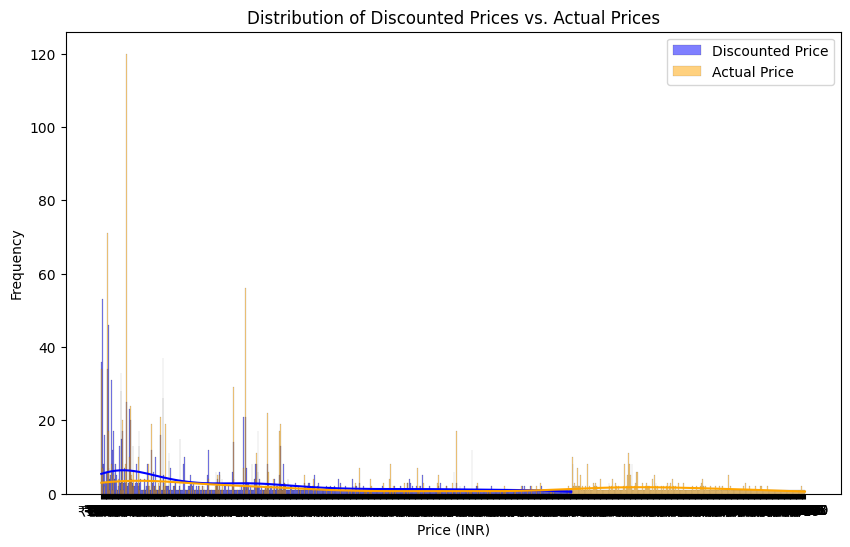

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df3, x='discounted_price', color='blue', label='Discounted Price', kde=True, bins=30)
sns.histplot(data=df3, x='actual_price', color='orange', label='Actual Price', kde=True, bins=30)
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Que.4  How does the average discount percentage vary across categories

In [ ]:
df3['discount_percentage'] = pd.to_numeric(df3['discount_percentage'], errors='coerce')

average_discount_percentage = df3.groupby('category')['discount_percentage'].mean()
print("Average Discount Percentage Across Categories:")
print(average_discount_percentage)

Average Discount Percentage Across Categories:
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&Writ

Que 5  What are the most popular product names

In [ ]:
most_popular_products = df3['product_name'].value_counts().head(10)
print("Most Popular Product Names:")
print(most_popular_products)

Most Popular Product Names:
product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                      4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)    3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                       3
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                 

Que 6  What are the most popular product keyword

In [ ]:
keywords = df3['product_name'].str.cat(sep=' ').lower()
keywords_list = re.findall(r'\b\w+\b', keywords)
most_common_keywords = Counter(keywords_list).most_common(10)
print("Most Popular Product Keywords:")
print(most_common_keywords)


Most Popular Product Keywords:
[('with', 752), ('for', 674), ('black', 530), ('usb', 417), ('cable', 414), ('1', 413), ('and', 331), ('c', 289), ('3', 275), ('2', 267)]


Que 7  What are the most popular product reviews

In [ ]:
most_popular_reviews = df3['review_title'].value_counts().head(10)
print("Most Popular Product Reviews:")
print(most_popular_reviews)

Most Popular Product Reviews:
review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine prod

Que.8  What is the correlation between discounted_price and rating

In [ ]:
df3['discounted_price'] = df3['discounted_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
correlation = df3[['discounted_price', 'rating']].corr().iloc[0, 1]
print(f"Correlation between Discounted Price and Rating: {correlation:.2f}")

Correlation between Discounted Price and Rating: 0.12


Que 9 What are the Top 5 categories based on the highest ratings

In [ ]:
top_categories_by_rating = df3.groupby('category')['rating'].mean().nlargest(5)
print("Top 5 Categories Based on the Highest Ratings:")
print(top_categories_by_rating)

Top 5 Categories Based on the Highest Ratings:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|Components|Memory                                     4.5
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


Que.10 Identify any potential areas for improvement or optimization based on the data analysis

In [ ]:
low_rating_high_count = df3[(df3['rating'] < 3) & (df3['rating_count'] > 100)]
print("Categories with Low Ratings but High Rating Counts:")
print(low_rating_high_count[['category', 'rating', 'rating_count']])

Categories with Low Ratings but High Rating Counts:
                                               category  rating  rating_count
1286  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...     2.8         109.0
1449  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...     2.9         159.0




EDA - 4

Spotify Data: Popular Hip-hop Artists and Tracks

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving spotify.csv to spotify.csv


In [ ]:
df4=pd.read_csv('spotify.csv')
df4

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


Que.1  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful

In [ ]:
print("Null values in each column:")
print(df4.isnull().sum())

Null values in each column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


In [ ]:
df4.dropna(inplace=True)



In [ ]:
duplicates = df4.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows if present
if duplicates > 0:
    df4.drop_duplicates(inplace=True)

Number of duplicate rows: 27


Que.2  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

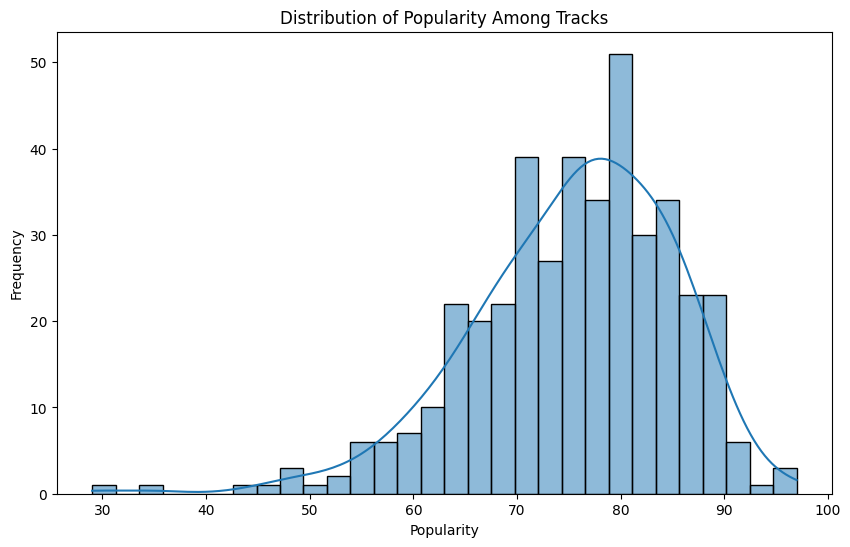

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df4['Popularity'], bins=30, kde=True)
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

Que 3  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

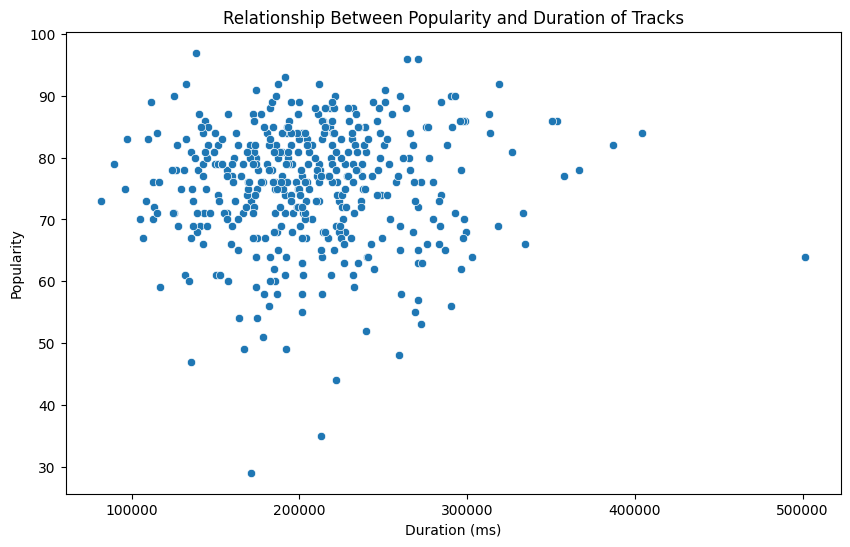

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df4, x='Duration (ms)', y='Popularity')
plt.title('Relationship Between Popularity and Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

Que.4  Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplo

Artist with the highest number of tracks: Drake (17 tracks)


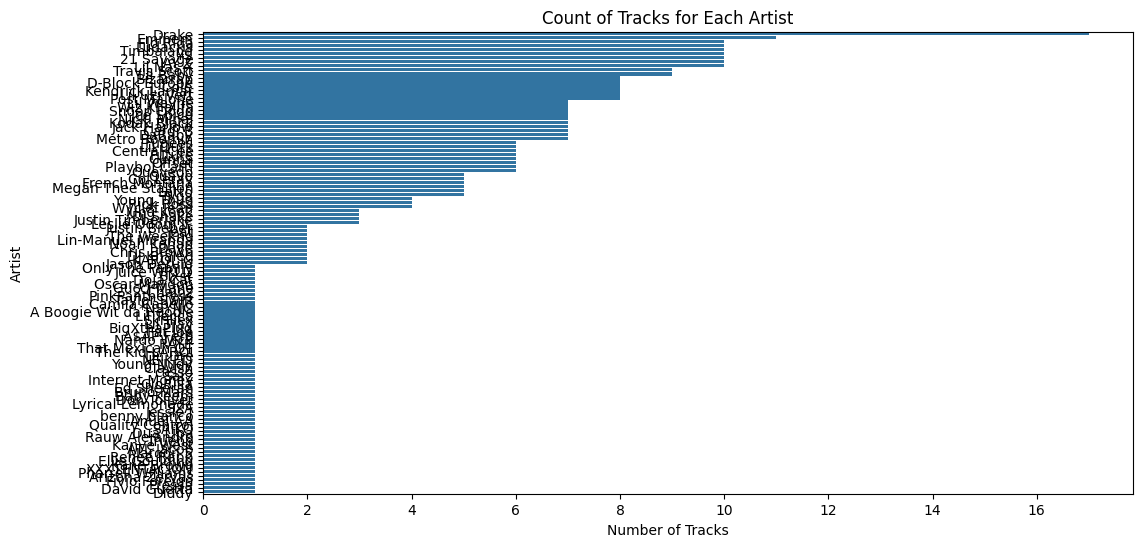

In [ ]:
artist_counts = df4['Artist'].value_counts()
top_artist = artist_counts.idxmax()
top_artist_count = artist_counts.max()
print(f"Artist with the highest number of tracks: {top_artist} ({top_artist_count} tracks)")

plt.figure(figsize=(12, 6))
sns.countplot(data=df4, y='Artist', order=artist_counts.index)
plt.title('Count of Tracks for Each Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

Que.5  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [ ]:
least_popular_tracks = df4.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


Que.6  Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist

In [ ]:
top_5_artists = artist_counts.nlargest(5).index
average_popularity = df4[df4['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean()
print("Average Popularity for Each of the Top 5 Most Popular Artists:")
print(average_popularity)

Average Popularity for Each of the Top 5 Most Popular Artists:
Artist
Drake        82.882353
Eminem       83.636364
Flo Rida     78.000000
Ludacris     63.000000
Timbaland    69.000000
Name: Popularity, dtype: float64


Que 7  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [ ]:
for artist in top_5_artists:
    most_popular_track = df4[df4['Artist'] == artist].nlargest(1, 'Popularity')[['Track Name', 'Popularity']]
    print(f"Most Popular Track for {artist}:")
    print(most_popular_track)

Most Popular Track for Drake:
                                Track Name  Popularity
0  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
Most Popular Track for Eminem:
    Track Name  Popularity
80  Without Me          90
Most Popular Track for Flo Rida:
             Track Name  Popularity
300  Low (feat. T-Pain)          84
Most Popular Track for Ludacris:
       Track Name  Popularity
371  My Chick Bad          67
Most Popular Track for Timbaland:
        Track Name  Popularity
380  The Way I Are          85


Que 8  Visualize relationships between multiple numerical variables simultaneously using a pair plot

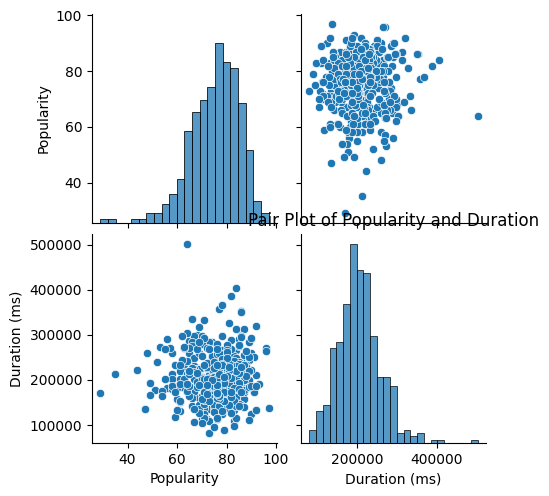

In [ ]:
sns.pairplot(df4[['Popularity', 'Duration (ms)']])
plt.title('Pair Plot of Popularity and Duration')
plt.show()

Que 9  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot


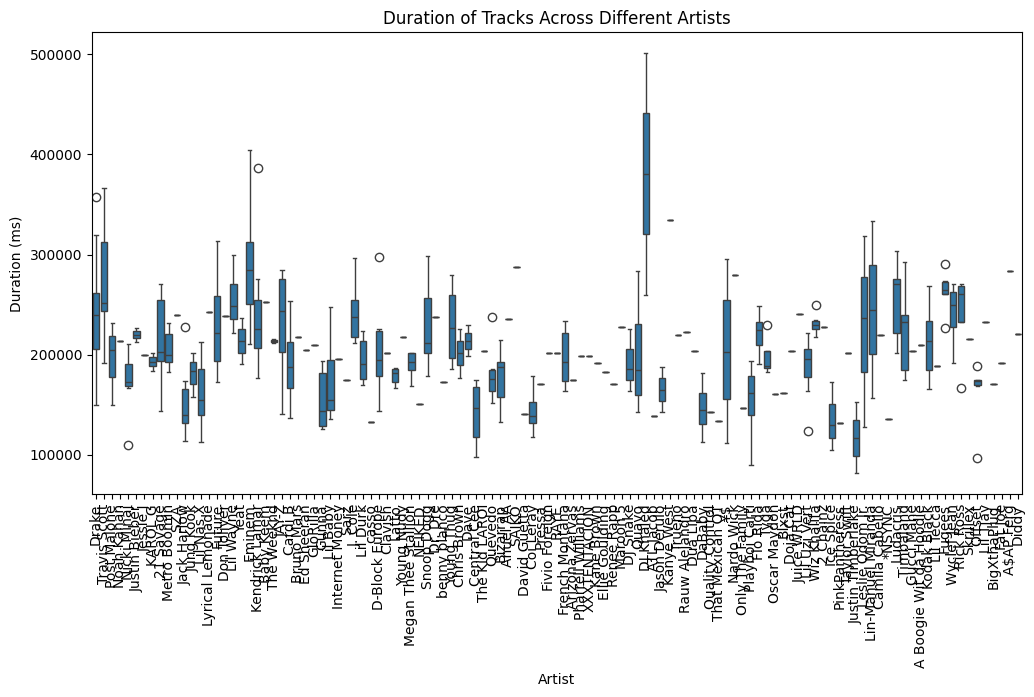

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df4, x='Artist', y='Duration (ms)')
plt.title('Duration of Tracks Across Different Artists')
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.show()

Que.10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.


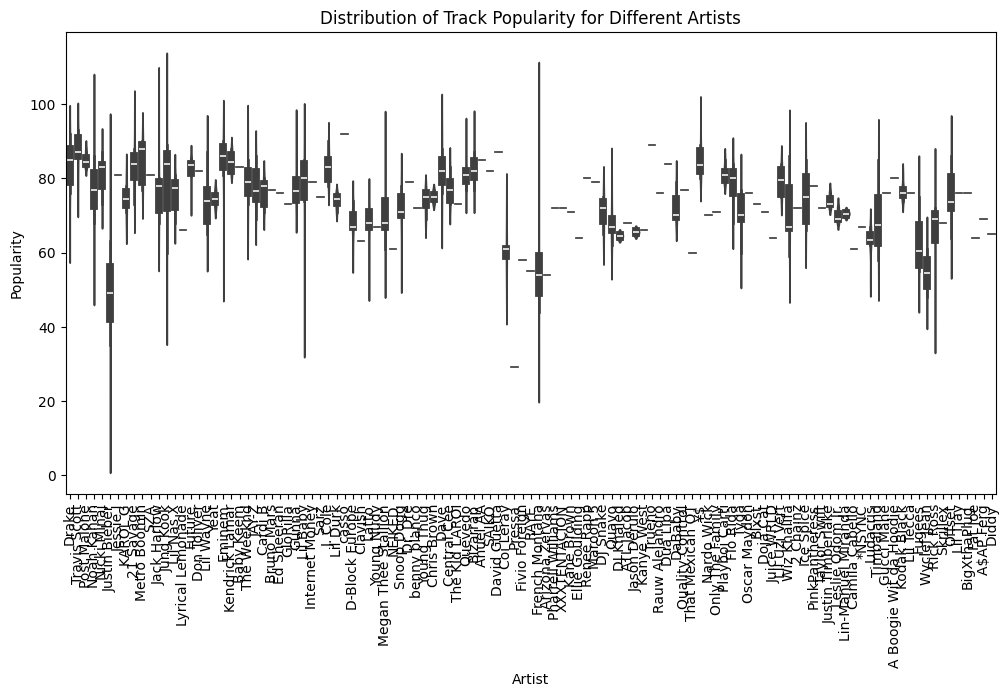

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df4, x='Artist', y='Popularity')
plt.title('Distribution of Track Popularity for Different Artists')
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.show()